# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

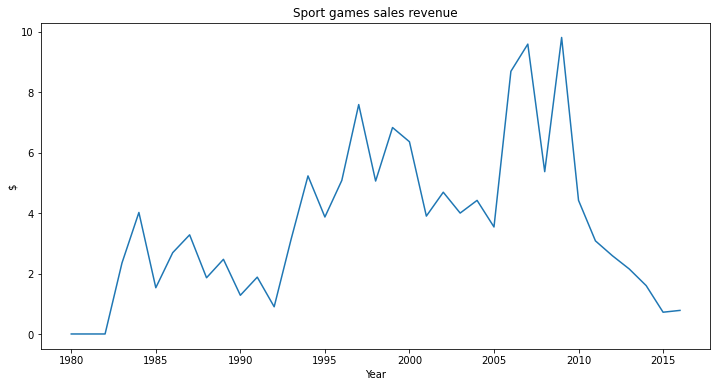

In [51]:
data = df[df['Genre'] == 'Sports'].groupby(['Year']).sum()['JP_Sales']
_, ax = plt.subplots(figsize=(12, 6))
ax.plot(data)
ax.set_title('Sport games sales revenue')
ax.set_xlabel('Year')
ax.set_ylabel('$')
plt.show()





### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

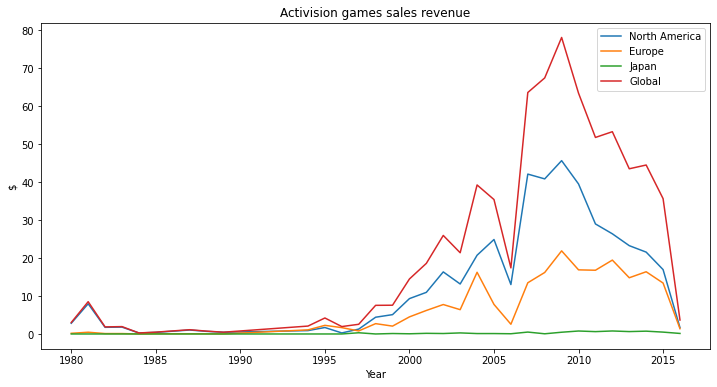

In [52]:
data = df[df['Publisher']=='Activision'].groupby('Year').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
_, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Activision games sales revenue')
ax.set_xlabel('Year')
ax.set_ylabel('$')
ax.plot(data['NA_Sales'])
ax.plot(data['EU_Sales'])
ax.plot(data['JP_Sales'])
ax.plot(data['Global_Sales'])
ax.legend(['North America', 'Europe', 'Japan', 'Global'])
plt.show()


### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

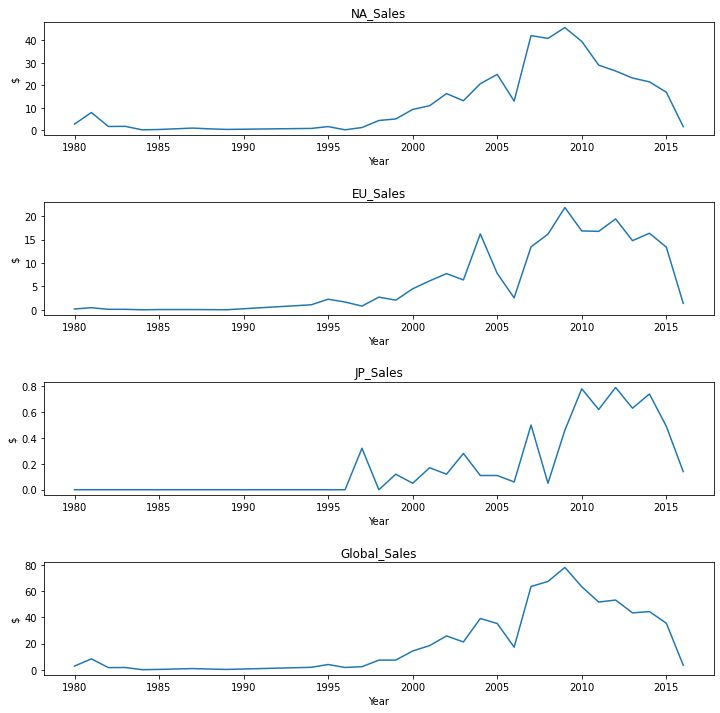

In [54]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
_, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
plt.subplots_adjust(hspace=.6)
for i, col in enumerate(cols):
    axes[i].set_title(col)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('$')
    axes[i].plot(data[col])
plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

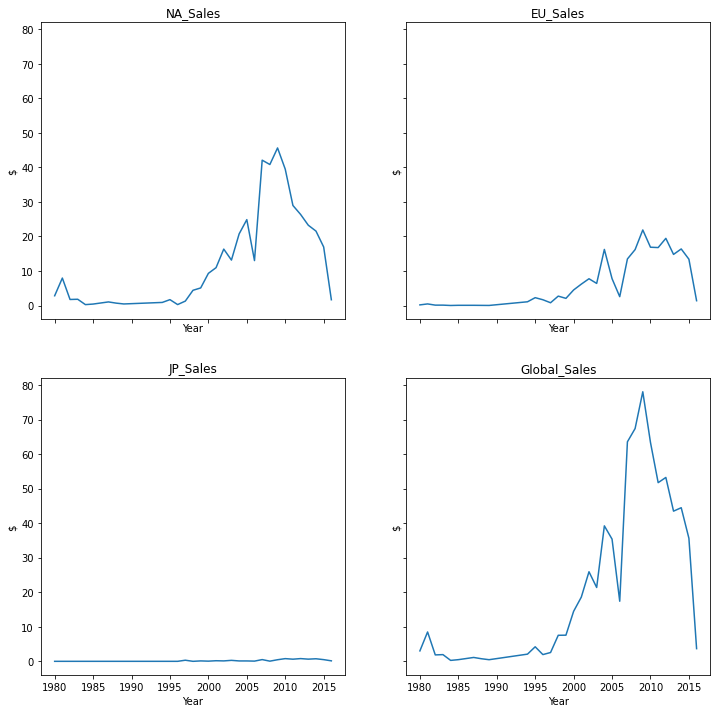

In [55]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
_, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12, 12))
for i, col in enumerate(cols):
    axes[i//2][i%2].set_title(col)
    axes[i//2][i%2].set_xlabel('Year')
    axes[i//2][i%2].set_ylabel('$')
    axes[i//2][i%2].plot(data[col])
plt.show()


### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

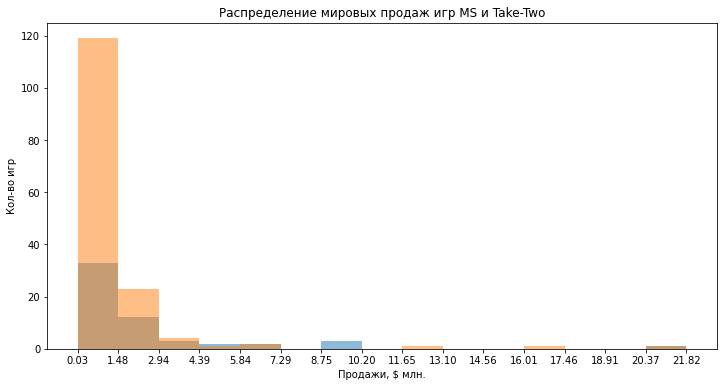

In [82]:
data_ms = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
data_t2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']

_, ax = plt.subplots(figsize=(12, 6))
_, bins, _ = ax.hist(data_ms, alpha=0.5, bins=15)
ax.set_title('Распределение мировых продаж игр MS и Take-Two')
ax.set_xlabel('Продажи, $ млн.')
ax.set_ylabel('Кол-во игр')
ax.hist(data_t2, alpha=0.5, bins=bins)
ax.set_xticks(bins)

plt.show()








### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

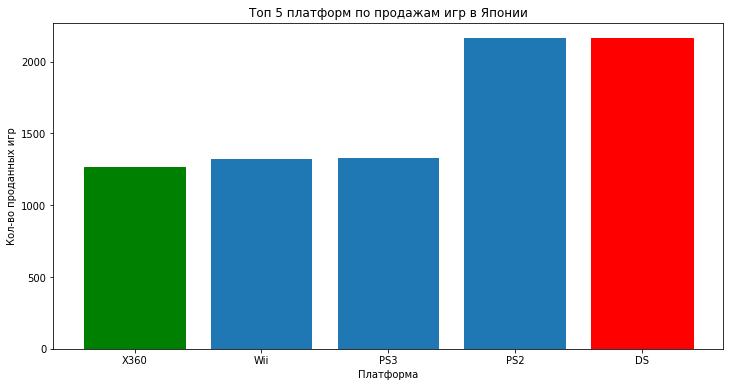

In [105]:
data = df.groupby('Platform').count()['JP_Sales'].sort_values()[-5:]
_, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Топ 5 платформ по продажам игр в Японии')
ax.set_xlabel('Платформа')
ax.set_ylabel('Кол-во проданных игр')
bar_lst = ax.bar(data.index, data)
bar_lst[0].set_color('green')
bar_lst[-1].set_color('red')


## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

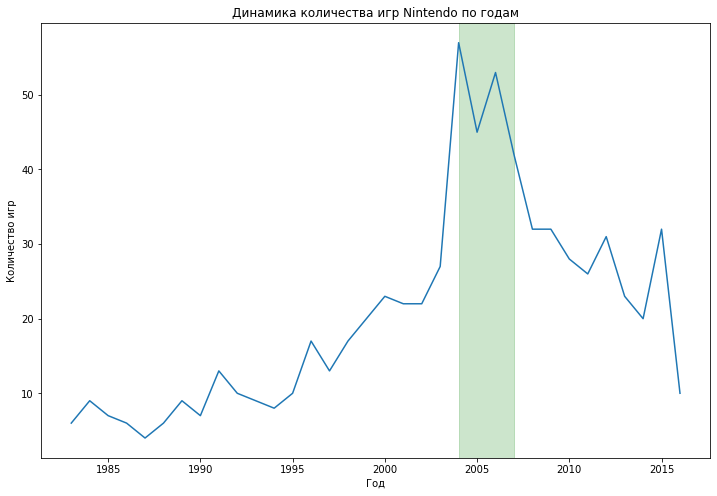

In [116]:
data = df[df['Publisher']=='Nintendo'].groupby('Year').agg('count')['Name']
data_slice = data[data > 35].index

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data)
ax.axvspan(xmin=data_slice.min(), xmax=data_slice.max(), color='green', alpha=.2)
ax.set_title('Динамика количества игр Nintendo по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')
plt.show()


### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [ ]:
### YOUR CODE HERE ###
